# IEEE CIS Fraud Detection

This notebook has code of Light BGM. All you need to do is load the required train and test set and it should work.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score,auc,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from pandas import Series, DataFrame
import xgboost as xgb
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import lightgbm as lgb
import time

# Reading in file

# Downsampled train data

In [2]:
df = pd.read_csv("Train_final.csv")
y=df['isFraud']
df=df.drop(['isFraud','Unnamed: 0'],axis=1)
df.head()
df.shape

(41326, 251)

In [3]:
y.value_counts()

1    20663
0    20663
Name: isFraud, dtype: int64

# Test set

In [4]:
#run if needed
test=pd.read_csv('Test_final.csv')

# #run if needed - test file encoding
# from sklearn.preprocessing import LabelEncoder
# for cols in test.select_dtypes(include='object').columns:
#     labelencoder = LabelEncoder()
#     test[cols] = labelencoder.fit_transform(test[cols])

test=test.drop(['Unnamed: 0'],axis=1)
test.shape
test.head()

,TransactionID,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C3,C5,C7,C9,C13,D1,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,V13,V14,V15,V17,V19,V20,V23,V24,V25,V26,V27,V29,V31,V35,V36,V37,V38,V39,V40,V41,V42,V44,V45,V46,V47,V48,V51,V53,V54,V55,V56,V59,V61,V62,V64,V65,V66,V67,V68,V69,V73,V75,V76,V77,V78,V79,V80,V82,V83,V85,V86,V87,V88,V90,V95,V96,V98,V99,V100,V104,V105,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V130,V131,V135,V136,V137,V169,V170,V171,V172,V173,V174,V175,V176,V180,V181,V183,V184,V185,V186,V187,V188,V189,V190,V191,V194,V195,V197,V198,V200,V201,V203,V205,V207,V208,V209,V210,V214,V215,V216,V218,V220,V221,V223,V224,V226,V227,V228,V229,V230,V234,V235,V238,V239,V240,V241,V242,V243,V245,V246,V247,V248,V250,V252,V255,V257,V258,V259,V260,V261,V262,V264,V267,V268,V270,V271,V274,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V297,V300,V301,V302,V303,V305,V309,V310,V312,V313,V314,V315,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,31.95,4,10409,111.0,150.0,4,226.0,3,170.0,87.0,1.0,17,0,6.0,0.0,3.0,0.0,6.0,115.0,419.0,27.0,398.0,27.0,418.0,203.0,409.0,2,2,0,3,1,0,2,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-5.0,133190.0,0.0,0.0,100.0,1,0.0,1,1,0.0,0.0,0.0,1,1,9,1,1,1,1,0,1184
1,3663550,49.00,4,4272,111.0,150.0,4,226.0,3,299.0,87.0,4.0,3,0,3.0,0.0,0.0,0.0,2.0,12.0,149.0,7.0,634.0,7.0,231.0,634.0,634.0,2,0,0,0,1,0,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,280.000000,77.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-5.0,133190.0,0.0,0.0,100.0,1,0.0,1,1,0.0,0.0,0.0,1,1,9,1,1,1,1,0,1184
2,3663551,171.00,4,4476,574.0,150.0,4,226.0,3,472.0,87.0,2635.0,20,0,2.0,0.0,0.0,0.0,4.0,22.0,137.0,10.0,97.0,10.0,136.0,136.0,97.0,2,2,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,705.000000,0.000000,0.0,263.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# Light GBM on downsampled data

In [6]:
t0 = time.process_time()
train_x,val_x,train_y,val_y = train_test_split(df,y, test_size=0.3,\
                                               random_state=78,stratify=y)

# create dataset for lightgbm
lgb_train = lgb.Dataset(train_x, label=train_y)
lgb_val=lgb.Dataset(val_x, label=val_y)
# lgb_test=lgb.Dataset(test)

# specify configurations
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 31,
    'num_iterations':200,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging fraction': 0.8,
    'bagging_freq': 5,
    'metric' : 'binary_error',
    'scale_pos_weight': 1
}

#Tuning parameter
params_grid = {
    'learning_rate': [0.07],
    'n_iterations': [100,500],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'feature_fraction' : [0.64, 0.65],
    'bagging fraction' : [0.7,0.75]
    }

model = lgb.LGBMClassifier(boosting_type= 'gbdt',
                           objective = 'binary',
                           silent = False,
                           eval_metric=params['metric'],
                           scale_pos_weight=params['scale_pos_weight'])

grid = GridSearchCV(model, params_grid, verbose=2,cv=5)
grid

grid.fit(train_x, train_y.astype(int))

print("---------------------------------------------------------")
print("The best params are")
print(grid.best_params_)
print(grid.best_score_)

#assigning best params
params['num_leaves']=grid.best_params_['num_leaves']
params['feature_fraction']=grid.best_params_['feature_fraction']
params['learning_rate']=grid.best_params_['learning_rate']
params['bagging fraction']=grid.best_params_['bagging fraction']
params['num_iterations']=grid.best_params_['n_iterations']

print("---------------------------------------------------------")
print('Using below parameters to fit: ')
print(params)

#fitting it again
gbm2 = lgb.train(params,
                lgb_train,
                num_boost_round=2)

#predictions
my_threshold=0.5

y_pred = gbm2.predict(train_x)  # train set
y_predicted=np.where(y_pred > my_threshold, 1, 0)

y_pred_2 = gbm2.predict(val_x)  # num_iteration=gbm.best_iteration
y_predicted_2=np.where(y_pred_2 > my_threshold, 1, 0)

t1 = time.process_time()
total = t1-t0
print("Time to process data = "+str(total) +" s")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary, total=   1.6s
[CV] bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary, total=   2.1s
[CV] bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary 
[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary, total=   2.0s
[CV] bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary 
[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary, total=   1.7s
[CV] bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary 
[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100, 

[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary, total=   1.6s
[CV] bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary 
[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary, total=   1.5s
[CV] bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary 
[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary, total=   1.4s
[CV] bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary 
[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=100, 

[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary, total=   2.2s
[CV] bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary 
[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary, total=   2.1s
[CV] bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary 
[CV]  bagging fraction=0.7, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary, total=   1.6s
[CV] bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100, num_leaves=20, objective=binary 
[CV]  bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=100

[CV]  bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary, total=   1.7s
[CV] bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary 
[CV]  bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary, total=   1.8s
[CV] bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary 
[CV]  bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary, total=   1.7s
[CV] bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary 
[CV]  bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.64, learning_rate=0.07, n_iteration

[CV]  bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=500, num_leaves=24, objective=binary, total=   1.7s
[CV] bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=500, num_leaves=24, objective=binary 
[CV]  bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=500, num_leaves=24, objective=binary, total=   1.6s
[CV] bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary 
[CV]  bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary, total=   1.7s
[CV] bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iterations=500, num_leaves=27, objective=binary 
[CV]  bagging fraction=0.75, boosting_type=gbdt, feature_fraction=0.65, learning_rate=0.07, n_iteration

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.4min finished


---------------------------------------------------------
The best params are
{'bagging fraction': 0.7, 'boosting_type': 'gbdt', 'feature_fraction': 0.64, 'learning_rate': 0.07, 'n_iterations': 100, 'num_leaves': 27, 'objective': 'binary'}
0.8360066371681416
---------------------------------------------------------
Using below parameters to fit: 
{'boosting_type': 'gbdt', 'objective': 'binary', 'num_leaves': 27, 'num_iterations': 100, 'learning_rate': 0.07, 'feature_fraction': 0.64, 'bagging fraction': 0.7, 'bagging_freq': 5, 'metric': 'binary_error', 'scale_pos_weight': 1}
Time to process data = 1404.3125 s


In [6]:
# lgb_df = lgb.Dataset(df, label=y)

# gbm_full = lgb.train(params,
#                 lgb_df,
#                 num_boost_round=2)

# y_pred_full = gbm_full.predict(df)  # train set
# y_predicted_full=np.where(y_pred > my_threshold, 1, 0)

# df_proba=pd.DataFrame(y_pred_full)
# df_proba.to_csv('df_proba_lgbm.csv')

# Metrics

The accuracy score of train 0.8552613384955752
The accuracy score of test 0.8385223423132764
---------------------------------------------------------
Classification report for train set
AUROC:  0.8552613384955752

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     14464
           1       0.88      0.82      0.85     14464

    accuracy                           0.86     28928
   macro avg       0.86      0.86      0.86     28928
weighted avg       0.86      0.86      0.86     28928

Classification report for test set
AUROC:  0.8385223423132764

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      6199
           1       0.86      0.80      0.83      6199

    accuracy                           0.84     12398
   macro avg       0.84      0.84      0.84     12398
weighted avg       0.84      0.84      0.84     12398

---------------------------------------------------------
The confus

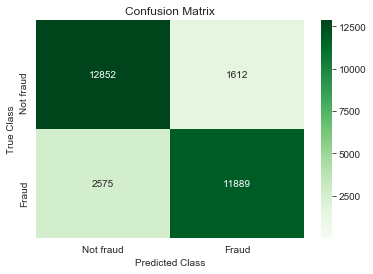

The confusion matrix for val set


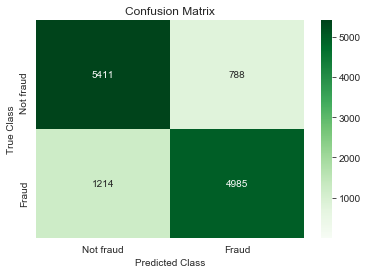

---------------------------------------------------------
The AUCROC curve for train set


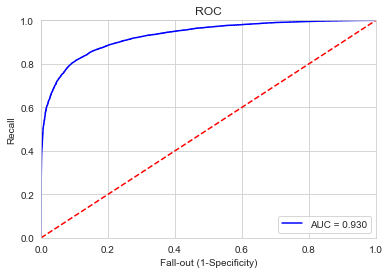

AUC score: 0.9299780061207809

The AUCROC curve for val set


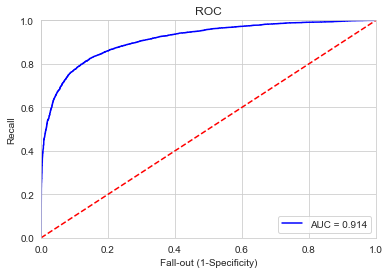

AUC score: 0.9138164648893902


In [7]:
accuracy_train=accuracy_score(train_y.astype(int),y_predicted)
print("The accuracy score of train",accuracy_train)

accuracy=accuracy_score(val_y.astype(int),y_predicted_2)
print("The accuracy score of test",accuracy)

print("---------------------------------------------------------")
#train set
print("Classification report for train set")
print("AUROC: ", roc_auc_score(train_y.astype(int), y_predicted))
print()
print(classification_report(train_y.astype(int), y_predicted))

#test set
print("Classification report for test set")
print("AUROC: ", roc_auc_score(val_y.astype(int), y_predicted_2))
print()
print(classification_report(val_y.astype(int), y_predicted_2))


print("---------------------------------------------------------")
print("The confusion matrix for train set")
#train set
sns.set_style("whitegrid")
plt.figure()
gbm_cm = confusion_matrix(train_y.astype(int), y_predicted)
labels = ['Not fraud', 'Fraud']
sns.heatmap(gbm_cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Greens", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#validation set
print("The confusion matrix for val set")
sns.set_style("whitegrid")
plt.figure()
gbm_cm = confusion_matrix(val_y.astype(int), y_predicted_2)
labels = ['Not fraud', 'Fraud']
sns.heatmap(gbm_cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Greens", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


print("---------------------------------------------------------")
print("The AUCROC curve for train set")
plt.figure()
# train set
false_positive_rate, recall, thresholds = roc_curve(train_y.astype(int), y_pred)
roc_auc = auc(false_positive_rate, recall)
plt.title('ROC')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='best')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)

# validation set
print()
print("The AUCROC curve for val set")
false_positive_rate, recall, thresholds = roc_curve(val_y.astype(int), y_pred_2)
roc_auc = auc(false_positive_rate, recall)
plt.title('ROC')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='best')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)

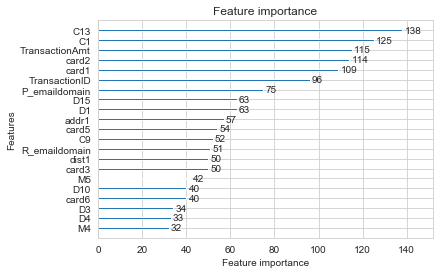

In [8]:
#feature importance
lgb.plot_importance(gbm2, max_num_features=21, importance_type='split')

Test it!

In [9]:
y_pred_test = gbm2.predict(test)  # num_iteration=gbm.best_iteration
y_predicted_test=np.where(y_pred_test > 0.5, 1, 0)

test_gbm_pred=pd.DataFrame(y_pred_test)
test_gbm_pred.to_csv('gbm_encoded.csv')